## Laboratorio 2: Modelo lineal y minimos cuadrados.

Manuel Felipe Pineda


- Consulte para que sirven los comandos fmincon, fminsearch de MatLab: 
  
  R:   
    **fmincon**, es un optimizador de funciones multivariadas no lineales, sujetas a restricciones.
    
    **fminsearch**, tiene el mismo objetivo pero con la diferencia es que la funcion ya no tiene restricciones.
  
    Es importante resaltar que ninguno de los métodos necesita la derivada de las funciones para encontrar el mínimo.
    
    Dado que ambas funciones son propias de matlab, se listan algunas alternativas open-source compatibles 
    con otros lenguajes y que cumplen las mismas funciones.
    
    [NLopt](http://ab-initio.mit.edu/wiki/index.php/NLopt) es una alternativa muy completa que se puede correr con 
    muchos lenguajes. Posee muchas funciones de optimización no lineal las cuales pueden resultar útiles en diferentes
    escenarios.
    
    La segunda opción es sólo para python, [scipy](http://www.scipy.org/) es un paquete para python el cual incluye
    una gran cantidad de métodos de optimización, entre ellos:
    
           - fmin_l_bfgs_b -- optimizacion L-BFGS-B con restricciones

           - fmin_tnc      -- Metodo trucado de Newton.

           - fmin_cobyla   -- Optimización con restricciones por aproximación lineal
           
- Consulte la utilidad de la tecnica 'TSVD (descomposición en valores singulares truncada) para lo solución de problemas lineales.'

  R: La TSVD es una aproximación de la SVD pero con menor rango, computacionalmente es una ventaja importante dado que
  muchas veces las matrices de la SVD contienen muchos ceros. Algunas aplicaciones practicas son la 
  compresion de imágenes y el análisis de la relación entre conjuntos de documentos.
  [ver LSA](https://en.wikipedia.org/wiki/Latent_semantic_analysis)
  
  En python se puede usar la función svd de scipy modificando el parametro *full_matrices* en caso
  de que se desee una aproximación.
  
  También puede usarse la funcion TruncatedSVD de [scikit](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)
  
  
- Consulte la utilidad del operador \ de MatLab.

  R: A \ B calcula inv(A) * B, tambien realiza aproximaciones en caso de que A no sea cuadrada o sea *casi* singular.
     En caso de que A sea rectangular realiza una solución por mínimos cuadrados al problema A * x = B
     
     En python puede ser calculada con pinv.
     
- Consulte la funciones pdist y pdist2 de MatLab.

   R: Calculan la distancia elemento a elemento entre 2 conjuntos de datos.
   En python se debe usar el método cdist de scipy.distance

- Consulte los comandos eig y svd de MatLab.
    
    R: eig descompone una matriz en los valores y vectores propios.
    svd realiza la descomposición en valores singulares.
    
    En python se pueden llamar desde numpy.linalg

- Demuestre en que consiste la solución dual del problema de mínimos cuadrados.

    R: 

- Si utiliza Python, consulte las funciones equivalentes en este lenguaje a los solicitadas en las actividades para MatLab.

    R: se realizó durante cada pregunta anterior.

- Revise el código de muestra 'demo_mincuadrados.m'.

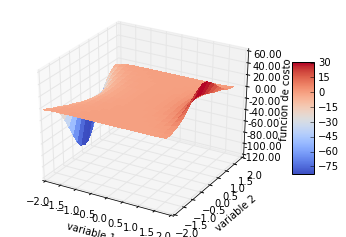

In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')


x = np.arange(-2, 2, 0.2)
y = np.arange(-2, 2, 0.2)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.multiply(xx, np.exp(xx ** 2 - yy ** 2))

# h = plt.contourf(x,y,z)

surf = ax.plot_surface(xx, yy, z, rstride=1, cstride=1,
                       cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('variable 1')
ax.set_ylabel('variable 2')
ax.set_zlabel('funcion de costo')

plt.show() 



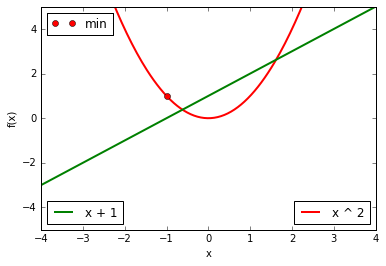

In [2]:
x = np.linspace(-4, 4, 200)

def f(x): 
    return x ** 2

def g(x):
    return x + 1

fx = f(x)
gx = g(x)
x0 = -1

plt.ylim((-5, 5))
line1 = plt.plot(x, fx, 'r', linewidth=2.0, label='x ^ 2')
line2 = plt.plot(x, gx, 'g', linewidth=2.0, label='x + 1')
minimun = plt.plot(x0, f(x0), 'ro', label='min')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.gca().add_artist(plt.legend(handles=line1, loc=4))
plt.gca().add_artist(plt.legend(handles=line2, loc=3))
plt.gca().add_artist(plt.legend(handles=minimun, loc=2))


plt.show()

- Encuentre el mínimo de f(x) para la restricción $g(x) = x^3 − 8 = 0$ graficando la función de costo y la restricción en la seccion 2.

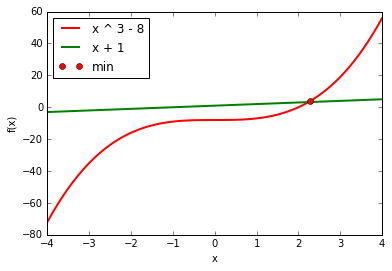

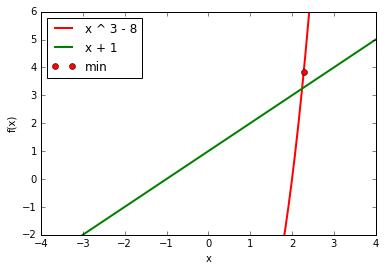

In [3]:
x = np.linspace(-4, 4, 200)

def f(x): 
    return (x **  3) - 8

def g(x):
    return x + 1

fx = f(x)
gx = g(x)
x0 = 2.28

line1 = plt.plot(x, fx, 'r', linewidth=2.0, label='x ^ 3 - 8')
line2 = plt.plot(x, gx, 'g', linewidth=2.0, label='x + 1')
minimun = plt.plot(x0, f(x0), 'ro', label='min')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc = 2)
plt.show()

plt.ylim((-2, 6))
line1 = plt.plot(x, fx, 'r', linewidth=2.0, label='x ^ 3 - 8')
line2 = plt.plot(x, gx, 'g', linewidth=2.0, label='x + 1')
minimun = plt.plot(x0, f(x0), 'ro', label='min')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc = 2)
plt.show()


- Cambie la varianza del ruido blanco gaussiano en la sección 3 del código y explique que pasa con los datos.

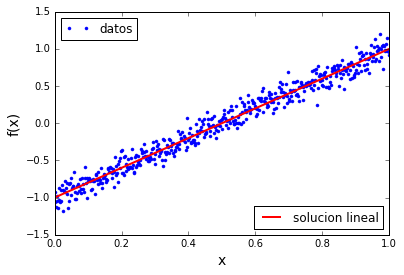

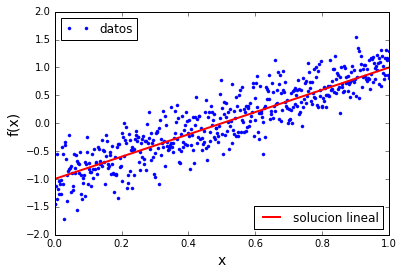

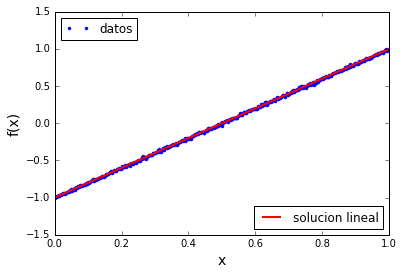

In [4]:
x = np.linspace(0,1,500)
y = 2 * x - 1
varn = 0.1

def genAndPlot(varn): 
    noise = np.random.normal(0, varn, size=len(y))
    yn = y + noise
    data = plt.plot(x, yn, '.', label='datos')
    line = plt.plot(x , y, 'r', linewidth=2, label='solucion lineal')
    plt.gca().add_artist(plt.legend(handles=data, loc=2))
    plt.gca().add_artist(plt.legend(handles=line, loc=4))
    plt.xlabel('x', fontsize=14)
    plt.ylabel('f(x)', fontsize=14)
    plt.show()

genAndPlot(0.1)
genAndPlot(0.3)
genAndPlot(0.01)

**R:** Como se puede observar en las gráficas, en la medida que varn sea mas grande, los datos se alejarán más de la función real.

- Cambie el dominio de los datos para la función sinc de la seccion 4 del código y explique que pasa con la aproximación lineal.

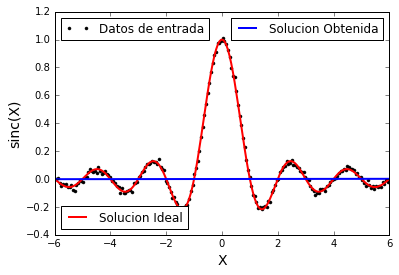

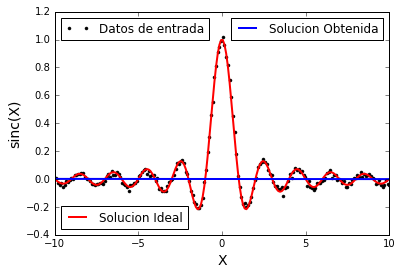

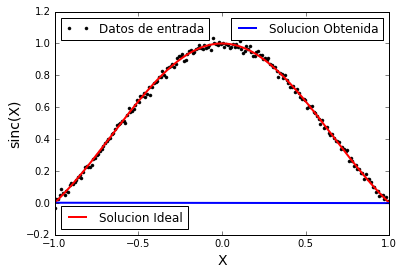

In [5]:
def linealMinCua(X, y, l = 0.0):
    C = X.transpose().dot(X)
    s = X.shape[1]
    T = np.linalg.pinv(C + l * np.eye(s, s))
    w =  T.dot(X.transpose()).dot(y)
    ye = X.dot(w)
    return [ye, w, C]

def genUnderDomain(a, b, c):
    x = np.linspace(a, b, c)
    X = np.array([x]).T
    y = np.array([np.sinc(x)]).T
    varn = 0.015;
    noise = np.random.normal(0, varn, size=len(y))
    noise = np.array([noise]).T
    yn = y + noise;
    # print (yn.shape)

    [ye, w, C] = linealMinCua(X, yn);

    data = plt.plot(x, yn, 'k.', label='Datos de entrada')
    ori = plt.plot(x, y, 'r', linewidth=2, label='Solucion Ideal')
    est = plt.plot(x, ye, 'b', linewidth=2, label='Solucion Obtenida')

    plt.gca().add_artist(plt.legend(handles=data, loc=2))
    plt.gca().add_artist(plt.legend(handles=ori, loc=3))
    plt.gca().add_artist(plt.legend(handles=est, loc=1))
    plt.xlabel('X', fontsize=14)
    plt.ylabel('sinc(X)', fontsize=14)
    plt.show()

genUnderDomain(-6, 6, 200)
genUnderDomain(-10, 10, 200)
genUnderDomain(-1, 1, 200)

R: Como la aproximaci{on lineal no es capaz de estimar la función, esta siempre muestra el valor de la recta y = 0

- Utilice una función base polinomial y una sigmoidal para aproximar la funcion sinc variando los parámetros de las funciones base y la varianza del ruido.

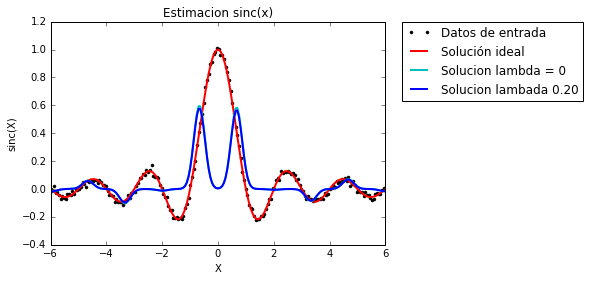

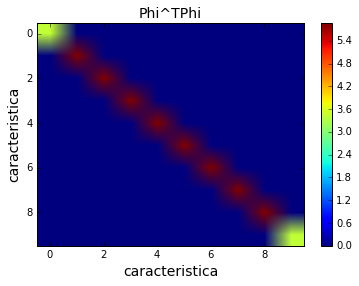

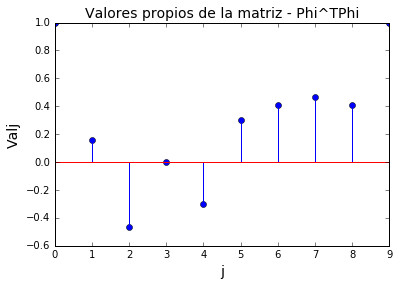

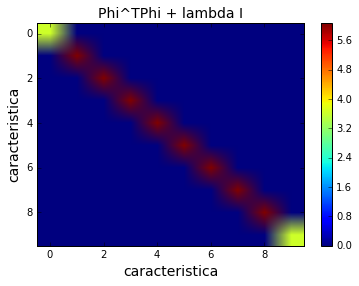

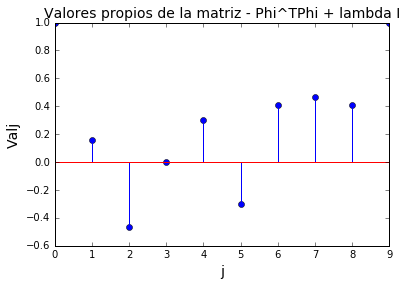

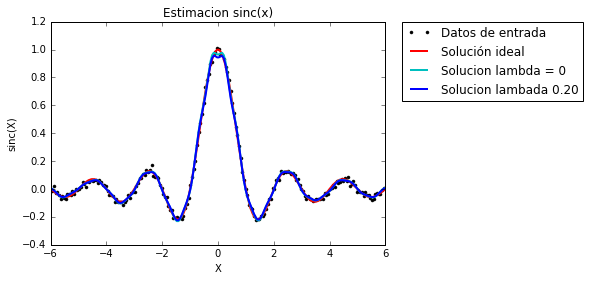

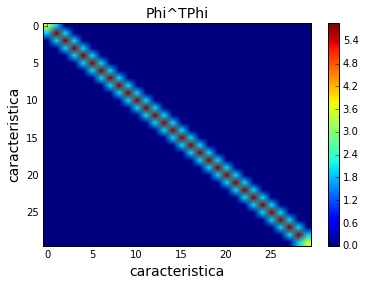

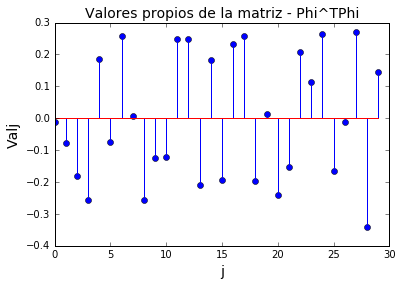

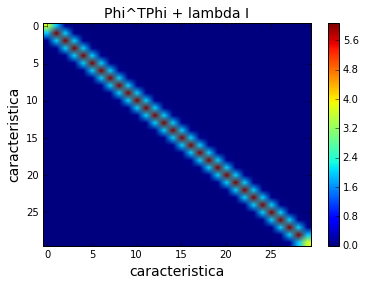

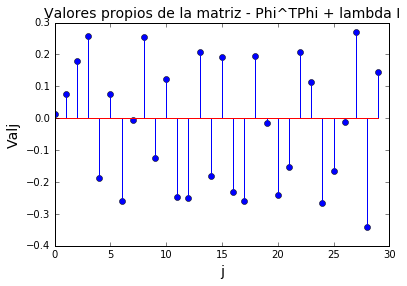

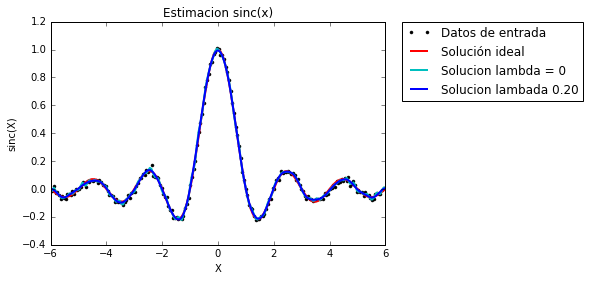

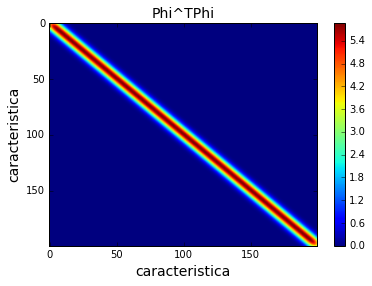

/home/pin3da/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


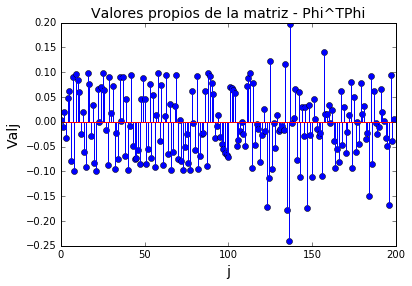

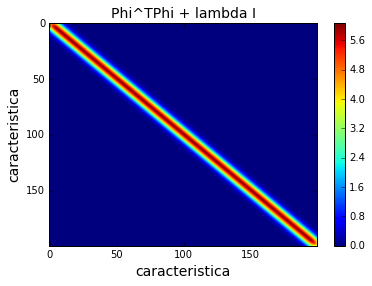

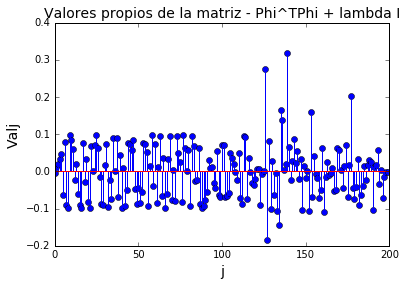

In [6]:
# 5. Mínimos cuadrados regularizados con representacion no lineal

x = np.linspace(-6, 6, 200)
X = np.array([x]).T
y = np.sinc(x)
Y = np.array([y]).T
varn = 0.015;
noise = np.random.normal(0, varn, size=len(y))
noise = np.array([noise]).T
yn = Y + noise

import scipy.spatial as ss

def Agauss(X, mu, sig = None):
    if (sig == None):
        sig = np.median(ss.distance.squareform(ss.distance.cdist(X, mu)))
    D = ss.distance.cdist(X, mu)
    phi = np.exp(-(D ** 2) / (2 * (sig ** 2)))
    return phi

def plotWithPhi(phi, yn):
    def lcurva(phi, Y):
        # TODO: implement l-curve
        return [0.2, 1]

    [ye0, w, C0] = linealMinCua(phi, yn)
    [la, M] = lcurva(phi, Y)
    ye = linealMinCua(phi, yn, la)[0]

    plt.plot(x, yn, 'k.', label = 'Datos de entrada')
    plt.plot(x, y, 'r', linewidth = 2, label = 'Solución ideal')
    plt.plot(x, ye0[:,0], 'c', linewidth = 2, label = 'Solucion lambda = 0')
    plt.plot(x, ye, 'b', linewidth = 2, label = 'Solucion lambada %.2f' % la)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Estimacion sinc(x)')
    plt.xlabel('X')
    plt.ylabel('sinc(X)')
    plt.show()


    plt.imshow(C0, aspect='auto')
    plt.colorbar()
    plt.xlabel('caracteristica', fontsize = 14)
    plt.ylabel('caracteristica', fontsize = 14)
    plt.title('Phi^TPhi', fontsize = 14)
    plt.show()

    w, Val0 = np.linalg.eig(C0)
    plt.stem(np.diag(Val0))
    plt.xlabel('j', fontsize = 14)
    plt.ylabel('Valj', fontsize = 14)
    plt.title('Valores propios de la matriz - Phi^TPhi', fontsize = 14)
    plt.show()

    CReg = C0 + la * np.eye(len(C0))
    w, Val1 = np.linalg.eig(CReg)

    plt.imshow(CReg, aspect='auto')
    plt.colorbar()
    plt.xlabel('caracteristica', fontsize = 14)
    plt.ylabel('caracteristica', fontsize = 14)
    plt.title('Phi^TPhi + lambda I', fontsize = 14)
    plt.show()

    plt.stem(np.diag(Val1))
    plt.xlabel('j', fontsize = 14)
    plt.ylabel('Valj', fontsize = 14)
    plt.title('Valores propios de la matriz - Phi^TPhi + lambda I', fontsize = 14)
    plt.show()
    
def plotSincApprox(LF): # Plots sinc approximation using LF latent functions
    sig = 0.2
    mu = np.linspace(-6, 6, LF)
    mu = np.array([mu]).T
    phi = Agauss(X, mu, sig)
    plotWithPhi(phi, yn)

    
plotSincApprox(10)
plotSincApprox(30)
plotSincApprox(200)

**Nota : ** Se utilizaron diferentes cantidades de funciones (Phi) con y sin regularización para ver que tan bien se aproximaba la funcion. El uso de la regularización es muy importante cuando se utilizan muchas funciones para aproximar, dado que si no se regulariza habrá overfitting y las predicciones no serán buenas.

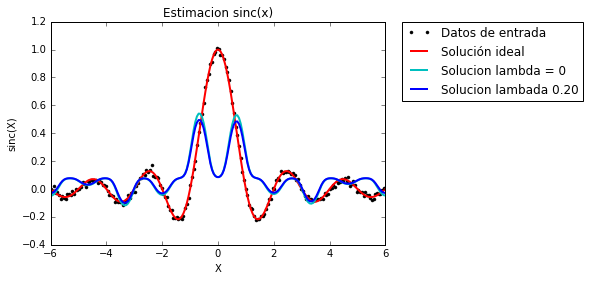

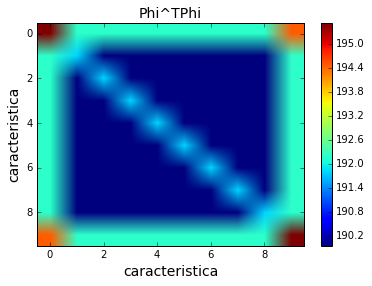

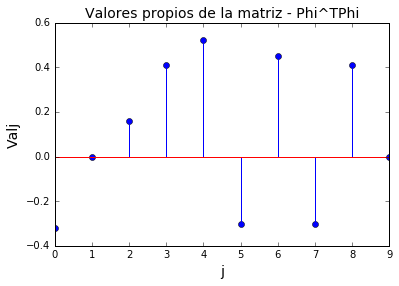

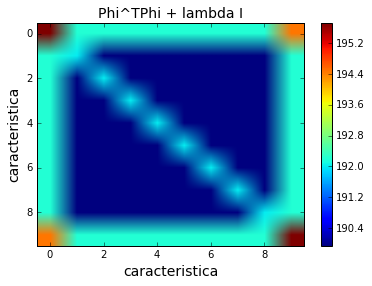

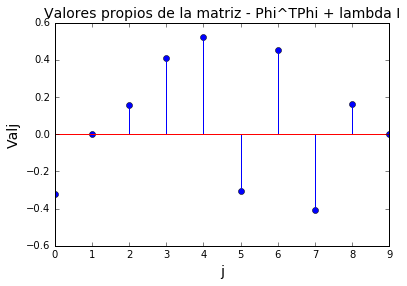

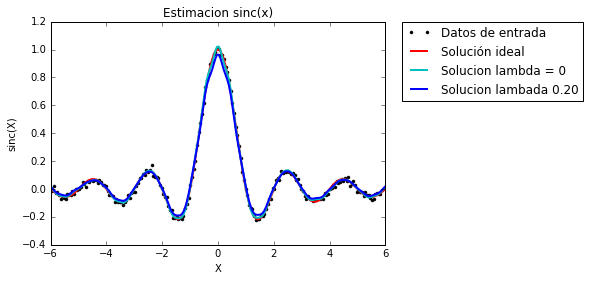

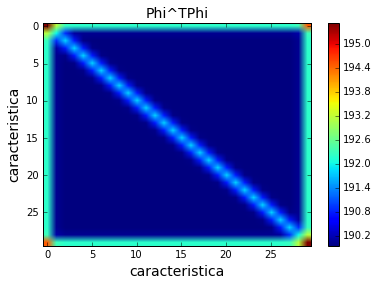

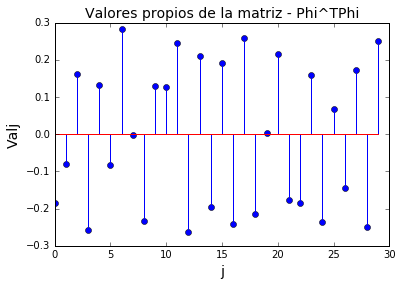

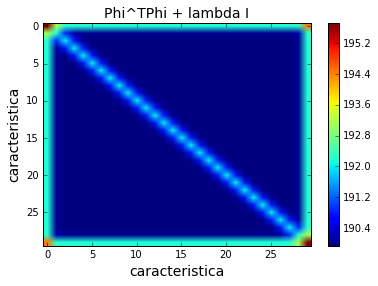

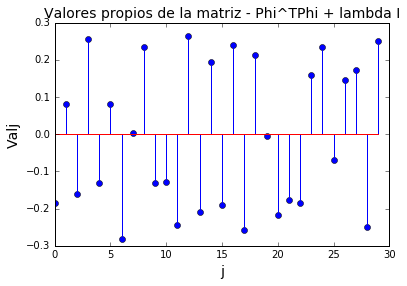

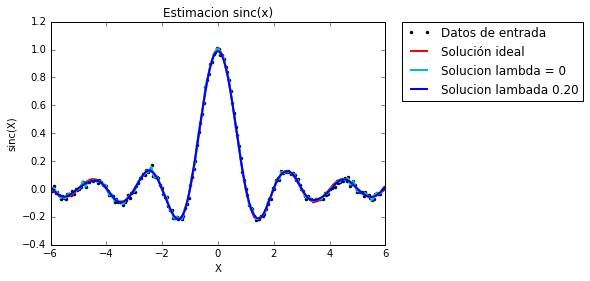

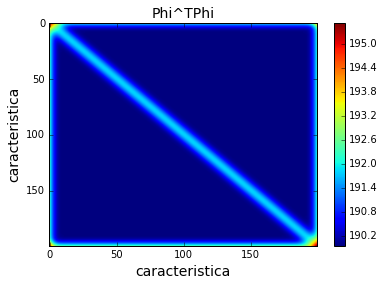

/home/pin3da/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


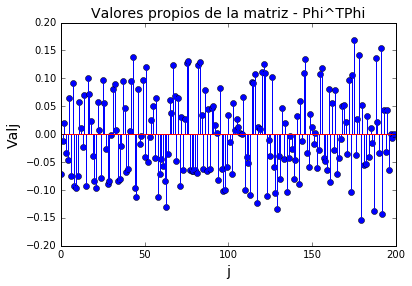

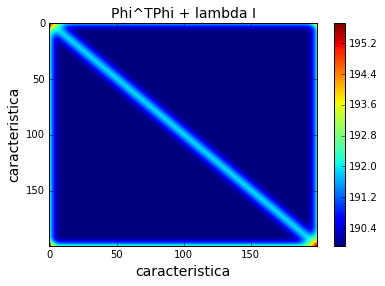

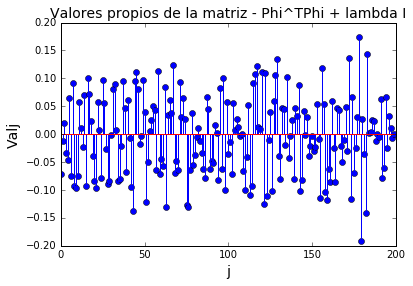

In [7]:
# Entrada:
#    X: matriz de datos de entrada de N x P, N: datos, P: características
#    mu: %u: matriz de medias referencia de Q x P
#    sig: >=0 varianza función exponencial
# Salida:
#    phi: matriz de representacion no lineal de N x Q

def Asigm(X, mu, sig):
    if (sig == None):
        sig = np.median(ss.distance.squareform(ss.distance.cdist(X, mu)))
    D = ss.distance.cdist(X, mu)
    phi = np.exp(-(D ** 2) / (2 * (sig ** 2)))
    phi = 1 + phi
    phi = 1 / phi
    return phi


def plotWithSig(X, yn, LF):
    sig = 0.2
    mu = np.linspace(-6, 6, LF)
    mu = np.array([mu]).T
    phi = Asigm(X, mu, sig)
    plotWithPhi(phi, yn)
    
    
plotWithSig(X, yn, 10)
plotWithSig(X, yn, 30)
plotWithSig(X, yn, 200)    

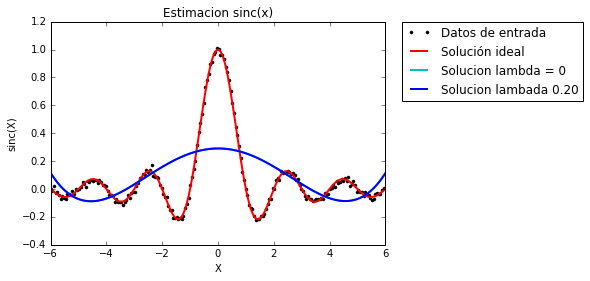

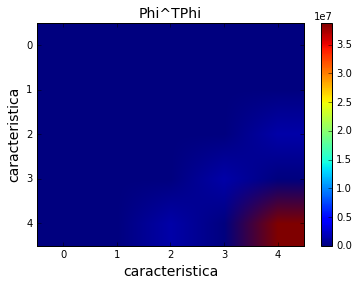

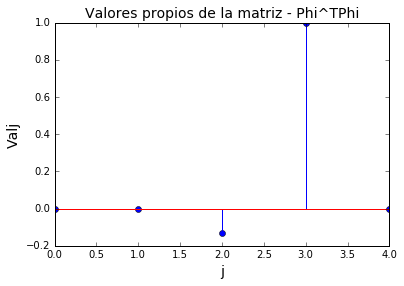

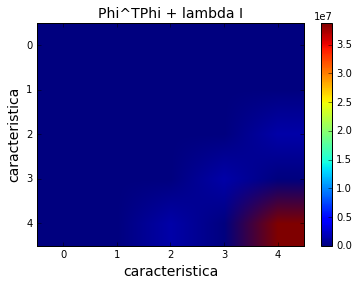

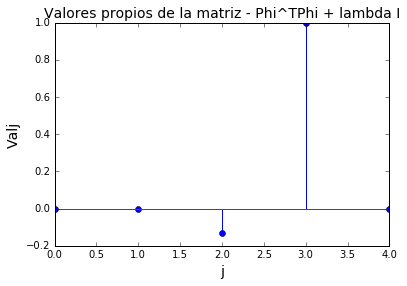

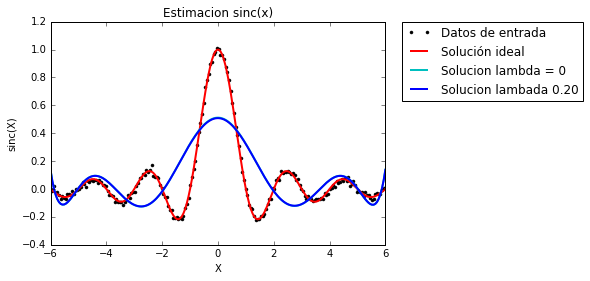

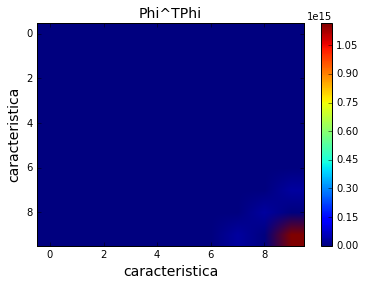

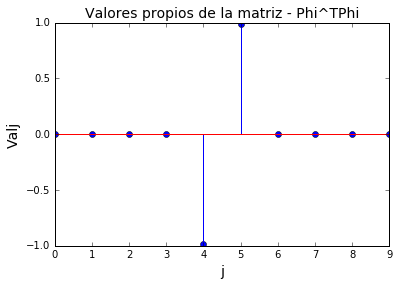

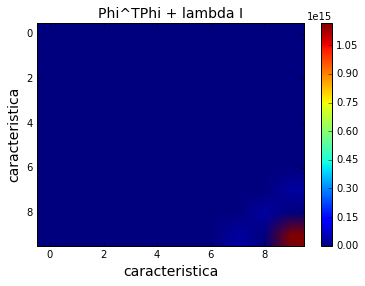

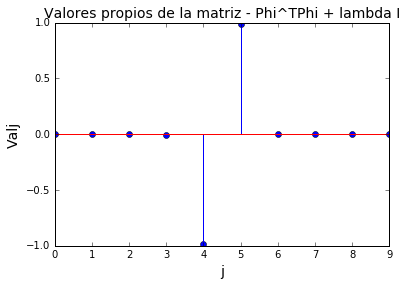

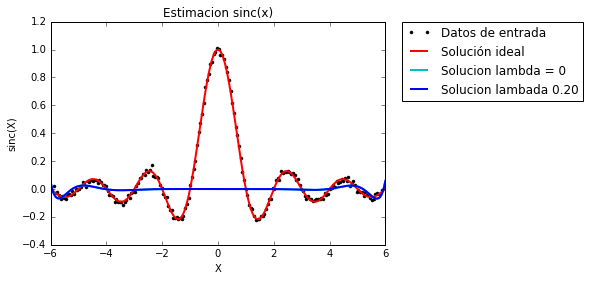

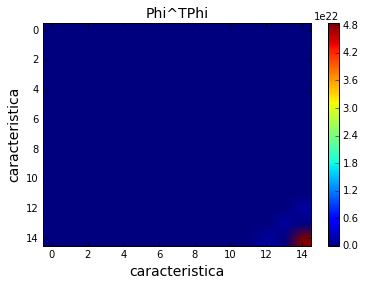

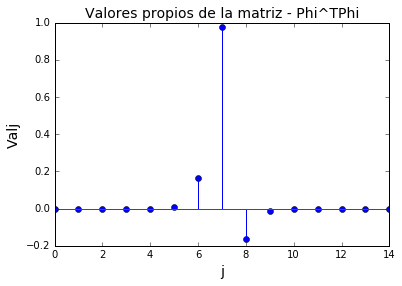

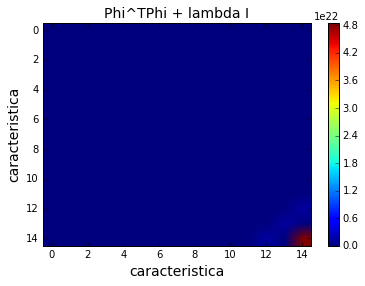

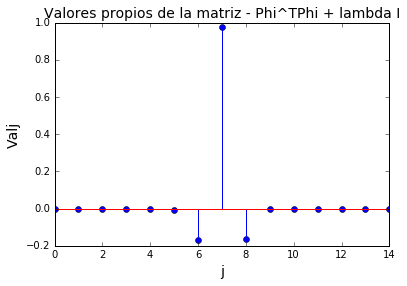

In [8]:
# Entrada:
#    X: matriz de datos de entrada de N x P, N: datos, P: características
#    D: grado del polinomio
# Salida:
#    phi: matriz de representacion no lineal de N x D

def Apoly(X, D):
    phi = np.ndarray(shape=(len(X), D), dtype=float)
    for i in range(0, len(X)):
        for j in range(D):
            phi[i][j] = X[i] ** j
            
    return phi


def plotWithPoly(D):
    sig = 0.2
    phi = Apoly(X, D)
    plotWithPhi(phi, yn)
    

plotWithPoly(5)
plotWithPoly(10)
plotWithPoly(15)


- Realice una aproximación de alguna variable de interés de una base de datos del repositorio Kaggle. Utilice un modelo lineal con y sin regularización, y al menos dos modelos lineales con representación no lineal regularizados. Grafique las matrices de covarianza, su espectro de valores propios, y la variable aproximada para cada uno de los casos.

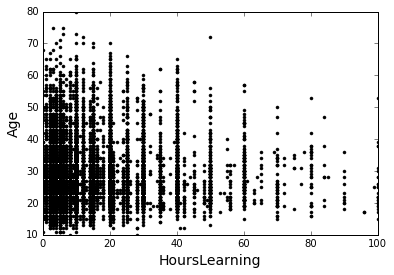

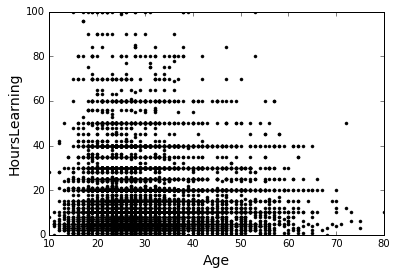

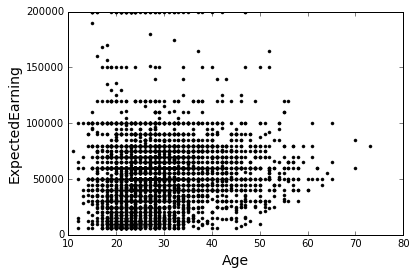

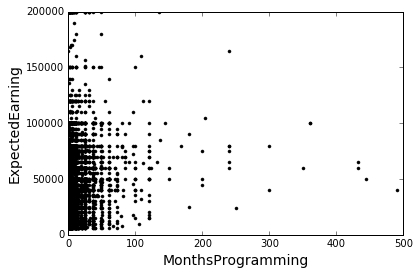

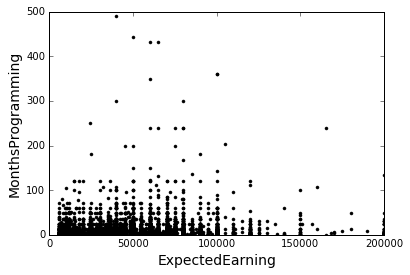

In [9]:
import pandas as pd
data = pd.read_csv("lab1-db/lab1.csv", sep=',', dtype={21: np.str, 57: np.str})


def getData(A, B):
    arr = np.array(data[A].values, dtype = np.float64)
    columns = arr.shape[0]
    arr = np.append(arr, data[B].values, axis=0)
    rows = arr.shape[0] // columns
    arr = arr.reshape(rows, columns)   
    X = arr.transpose()
    X = X[~np.isnan(X).any(axis=1)] # delete all rows that contain nan-values.
    X = X[np.lexsort(np.fliplr(X).T)]
    x = X[:,0]
    y = X[:,1]
    X = np.array(x).T
    Y = np.array(y).T
    return X, Y
    
def scatterPlot(A, B):
    X, Y = getData(A, B)
    plt.plot(X, Y, '.k')
    plt.xlabel(A, fontsize = 14)
    plt.ylabel(B, fontsize = 14)
    plt.show()
    

scatterPlot("HoursLearning", "Age")
scatterPlot("Age", "HoursLearning")
scatterPlot("Age", "ExpectedEarning")
scatterPlot("MonthsProgramming", "ExpectedEarning")
scatterPlot("ExpectedEarning", "MonthsProgramming")


Se dibujan gráficas entre algunos pares de variables para ver cómo se relacionan y elegir cual aproximar.

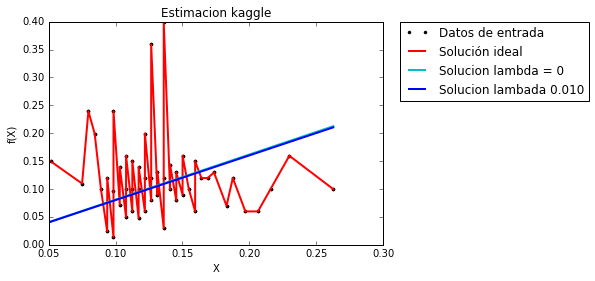

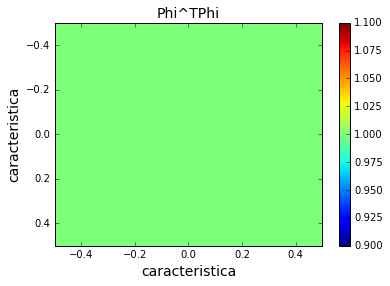

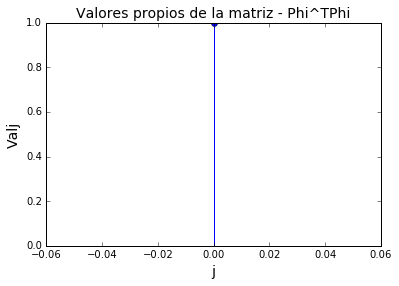

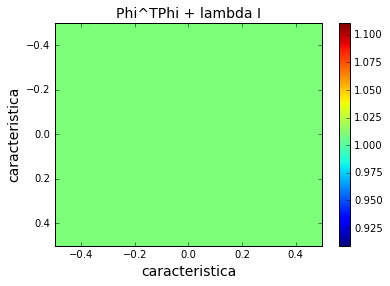

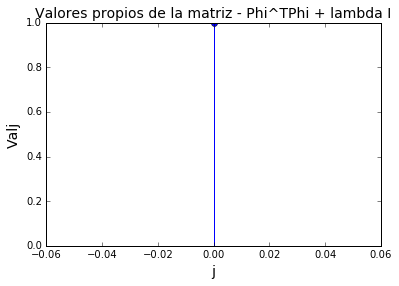

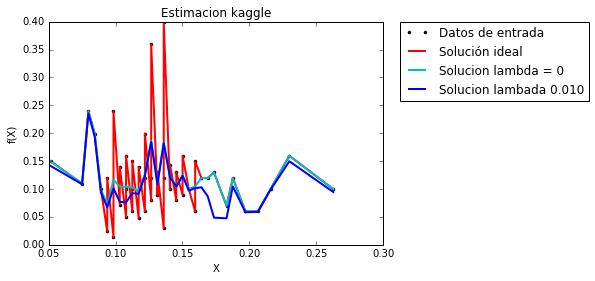

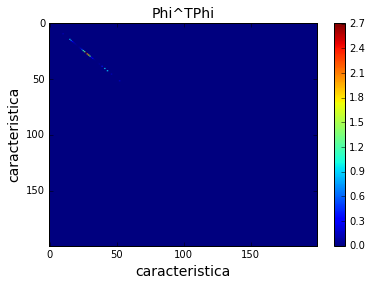

/home/pin3da/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


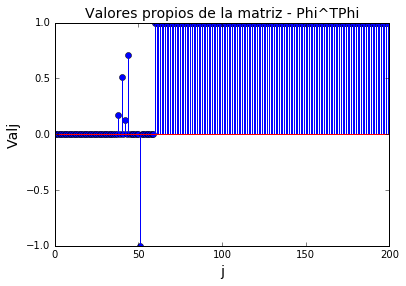

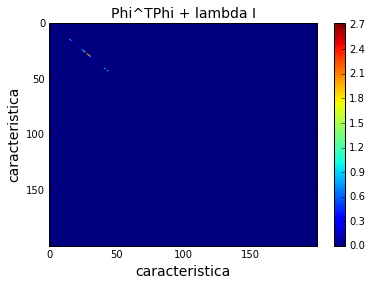

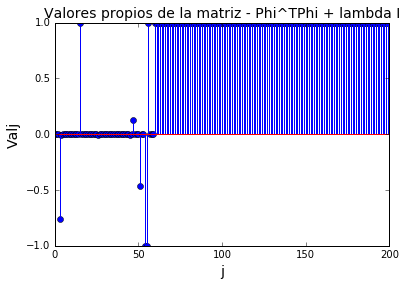

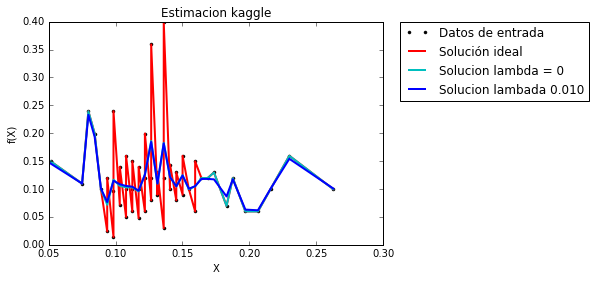

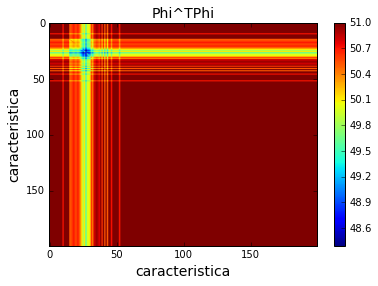

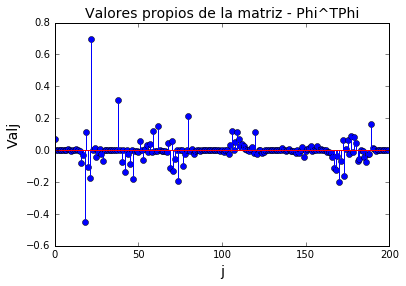

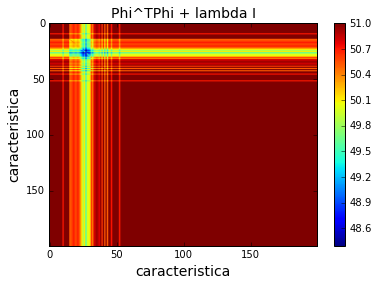

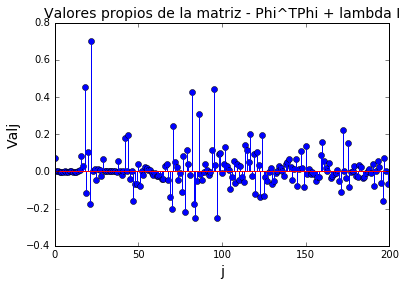

In [18]:
# xp, yp = getData('ExpectedEarning', 'MonthsProgramming')
# xp, yp = getData('Age', 'MonthsProgramming')
xp, yp = getData('Age', 'ExpectedEarning')

s = len(xp)
xp = xp[0:s:s // 50]
yp = yp[0:s:s // 50]

xp = xp / np.linalg.norm(xp)
yp = yp / np.linalg.norm(yp)

XP = np.array([xp]).T
YP = np.array([yp]).T

plt.plot(xp, yp, '.k')

def kaggle(phi, x, y, yn):
    def lcurva(phi, Y):
        # TODO: implement l-curve
        return [0.01, 1]

    [ye0, w, C0] = linealMinCua(phi, yn)
    [la, M] = lcurva(phi, yn)
    ye = linealMinCua(phi, yn, la)[0]

    plt.plot(x, yn, 'k.', label = 'Datos de entrada')
    plt.plot(x, y, 'r', linewidth = 2, label = 'Solución ideal')
    plt.plot(x, ye0[:,0], 'c', linewidth = 2, label = 'Solucion lambda = 0')
    plt.plot(x, ye, 'b', linewidth = 2, label = 'Solucion lambada %.3f' % la)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Estimacion kaggle')
    plt.xlabel('X')
    plt.ylabel('f(X)')
    plt.show()

    
    plt.imshow(C0, aspect='auto')
    plt.colorbar()
    plt.xlabel('caracteristica', fontsize = 14)
    plt.ylabel('caracteristica', fontsize = 14)
    plt.title('Phi^TPhi', fontsize = 14)
    plt.show()

    w, Val0 = np.linalg.eig(C0)
    plt.stem(np.diag(Val0))
    plt.xlabel('j', fontsize = 14)
    plt.ylabel('Valj', fontsize = 14)
    plt.title('Valores propios de la matriz - Phi^TPhi', fontsize = 14)
    plt.show()

    CReg = C0 + la * np.eye(len(C0))
    w, Val1 = np.linalg.eig(CReg)

    plt.imshow(CReg, aspect='auto')
    plt.colorbar()
    plt.xlabel('caracteristica', fontsize = 14)
    plt.ylabel('caracteristica', fontsize = 14)
    plt.title('Phi^TPhi + lambda I', fontsize = 14)
    plt.show()

    plt.stem(np.diag(Val1))
    plt.xlabel('j', fontsize = 14)
    plt.ylabel('Valj', fontsize = 14)
    plt.title('Valores propios de la matriz - Phi^TPhi + lambda I', fontsize = 14)
    plt.show()
    
    
sig = 0.001
mu = np.linspace(0, 1.0, 200)
mu = np.array([mu]).T
phi = Agauss(XP, mu, sig)
kaggle(XP, xp, yp, YP)
kaggle(phi, xp, yp, YP)
phi = Asigm(XP, mu, sig)
kaggle(phi, xp, yp, YP)

### Discusion 

*Contexto:* La base de datos usada, tiene información de personas que están aprendiendo a programar. 

Para el último punto del taller, se trató de analizar el salario que esperaban dichas personas en función de su edad.

Como era de esperarse, el modelo lineal no logra representar bien los datos, pero nos aporta información relevante: El salario esperado incrementa en la medida que incremente la edad de las personas.

Usando una representación no lineal del modelo lineal, se tiene una mejor aproximación que podría usarse por ejemplo para hacer predicciones.